<a href="https://colab.research.google.com/github/BI-DS/ELE-3909/blob/master/lecture4/crossval_k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import davies_bouldin_score as db_score

# Cross-validation
Hyperparameters can be chosen based on cross-validation techniques. We simply repeat a task K times, and for each k iteration we calculate a metric of interest.

In [7]:
# download dataset in csv file direclty
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
# We wont use the country, only numerical variables
# hence, I select the data after the 1st column
X = df.iloc[:,1:10].values

## A simple approach for cross-validation

In [44]:
# This parameter tells how many times we repeat the calculations
K = 8

# define dictionaries and lists to save main results
hierarchical_cv = {}
kmeans_cv = {}
hierarchical_silhouette = []
hierarchical_db = []
kmeans_silhouette = []
kmeans_db = []

# we start at 2, since clustering for K=1 doesnt make sense
for k in range(2,K+1):
  # First hierarchical
  P = linkage(X, method='ward', metric='euclidean')
  cluster_labels = fcluster(P, k, criterion='maxclust')
  # using the cluster_labels we calculate both scores
  silhouette = silhouette_score(X, cluster_labels)
  db   = db_score(X,cluster_labels)

  # save results
  temp_dict = {'silhouette':silhouette,'db':db}
  hierarchical_cv[k] = temp_dict
  hierarchical_silhouette.append(silhouette)
  hierarchical_db.append(db)

  # Second kmeans
  kmeans = KMeans(n_clusters=k, n_init="auto")
  cluster_labels = kmeans.fit_predict(X)
  silhouette = silhouette_score(X, cluster_labels)
  db   = db_score(X,cluster_labels)

  # save results
  temp_dict = {'silhouette':silhouette,'db':db}
  kmeans_cv[k] = temp_dict
  kmeans_silhouette.append(silhouette)
  kmeans_db.append(db)


## Plotting the results
We can now plot both indexes and select the optimal K value

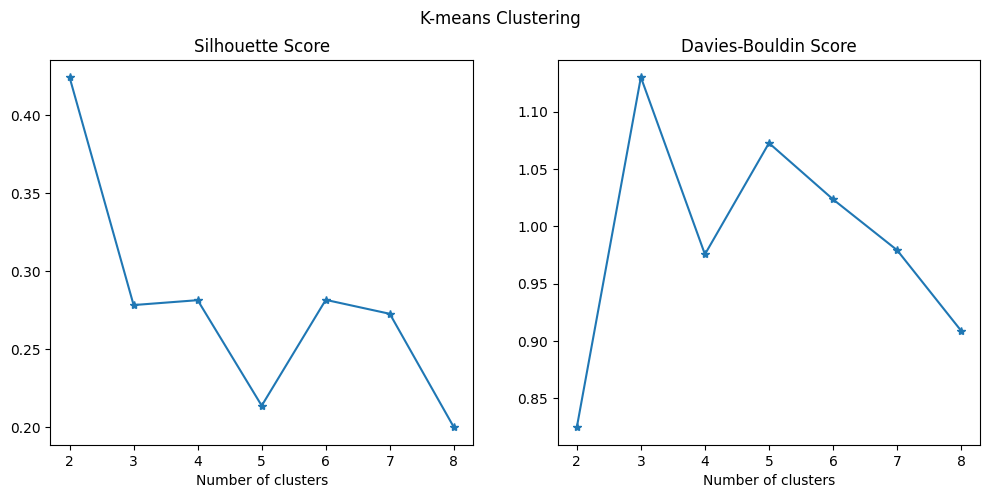

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
ax1.plot(range(2,K+1),kmeans_silhouette,marker='*')
ax1.set_title("Silhouette Score")
ax1.set_xlabel("Number of clusters")
ax2.plot(range(2,K+1),kmeans_db,marker='*')
ax2.set_title("Davies-Bouldin Score")
ax2.set_xlabel("Number of clusters")
fig.suptitle('K-means Clustering')
plt.show()

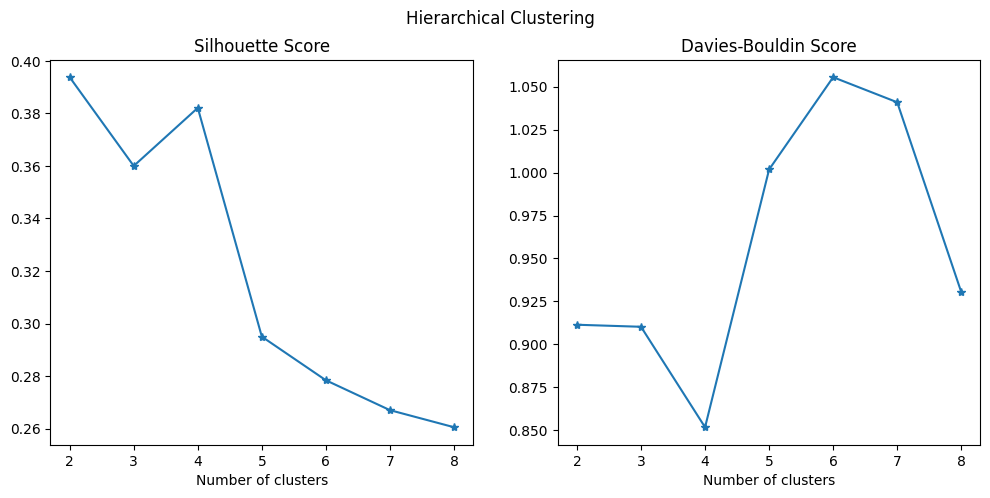

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,5))
ax1.plot(range(2,K+1),hierarchical_silhouette,marker='*')
ax1.set_title("Silhouette Score")
ax1.set_xlabel("Number of clusters")
ax2.plot(range(2,K+1),hierarchical_db,marker='*')
ax2.set_title("Davies-Bouldin Score")
ax2.set_xlabel("Number of clusters")
fig.suptitle("Hierarchical Clustering")
plt.show()